In [1]:
from modules.OrderedClustering import OrderedClustering
from modules.DataPreprocessor import DataPreprocessor
from modules.ANNModel import ANNModel

In [2]:
import pandas as pd
from keras.callbacks import EarlyStopping

# **Flood Total Duration (Minutes)**

In [3]:
filename = 'dataset/KS_NV_VA_flash_flood_oc.csv'
data = pd.read_csv(filename)
data

,State,County,Year,Month,Flash Flood Occurrence Count,DSCI,None,D0,D1,D2,...,Planar Curvature Median,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90
0,VA,Appomattox County,2010,1,2,0,100.000000,0.000000,0.0,0.0,...,294750816.0,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,7.680000e+13,-332194912.0,3.746295e+09
1,VA,Augusta County,2010,1,4,0,100.000000,0.000000,0.0,0.0,...,157697392.0,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,4.880000e+14,15378728.0,3.376817e+09
2,VA,Bath County,2010,1,1,0,100.000000,0.000000,0.0,0.0,...,208110000.0,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,3.800000e+14,0.0,5.823914e+09
3,VA,Botetourt County,2010,1,5,0,100.000000,0.000000,0.0,0.0,...,267952192.0,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,4.410000e+14,79725392.0,5.026470e+09
4,VA,Buckingham County,2010,1,2,0,100.000000,0.000000,0.0,0.0,...,264418016.0,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,1.100000e+14,-330291104.0,3.485563e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,VA,Mathews County,2022,11,0,0,100.000000,0.000000,0.0,0.0,...,0.0,5.352301e+07,-9.530029e+09,1.122834e+10,2.075837e+10,3.185267e+06,3.199294e+08,2.740000e+12,0.0,6.085405e+07
3105,VA,Charlotte County,2022,12,0,81,19.037419,80.962581,0.0,0.0,...,107529920.0,2.013440e+09,-2.479000e+10,2.098264e+10,4.577264e+10,6.810913e+07,1.908681e+09,1.100000e+14,-65774708.0,2.249278e+09
3106,VA,Emporia City,2022,12,0,16,83.870968,16.129032,0.0,0.0,...,0.0,8.932176e+08,-1.247816e+10,1.222974e+10,2.470791e+10,5.104680e+07,1.353999e+09,1.160000e+12,0.0,1.192570e+09
3107,VA,Manassas City,2022,12,0,23,77.419355,22.580645,0.0,0.0,...,4644510.5,1.217640e+09,-2.033943e+10,1.604419e+10,3.638362e+10,4.476273e+07,1.676904e+09,1.550000e+12,0.0,1.466368e+09


In [4]:
target_col = data['Flash Flood Occurrence Count']
target_col_name = 'Flash Flood Occurrence Count'
max_iter = 10
n_init = 100
n_classes = 7

In [5]:
ordered_clustering = OrderedClustering(target_col, max_iter, n_init)

In [6]:
cluster_results, inertia_results = ordered_clustering.clustering()

----------------------------------------
Number of Clusters: 1

Inertia: 17721.580572531388

Silhouette Score: 0 (Only one unique label)

Cluster Centers (sorted by ascending means):
Cluster 1: 1.4091347700225176

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 29, 31]

Number of Points in Clusters:
Cluster 1: 3109
----------------------------------------
Number of Clusters: 2

Inertia: 7511.711047322407

Silhouette Score: 0.8391164485211317

Cluster Centers (sorted by ascending means):
Cluster 1: 1.027544507893852
Cluster 2: 10.015151515151517

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 2, 3, 4, 5]
Cluster 2: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 29, 31]

Number of Points in Clusters:
Cluster 1: 2977
Cluster 2: 132
----------------------------------------
Number of Clusters: 3

Inertia: 3696.322203757891

Silhouette Score: 0.7368

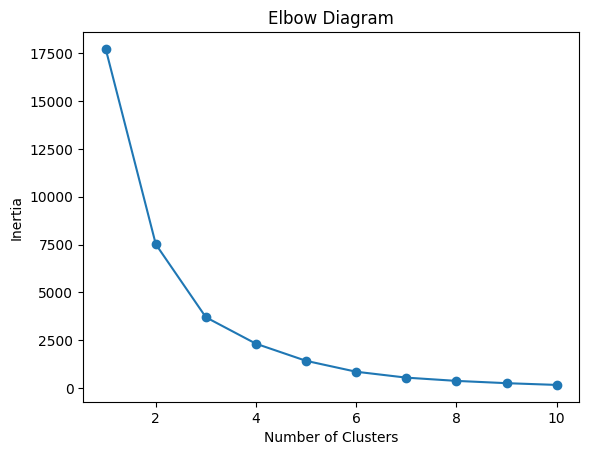

In [7]:
ordered_clustering.elbow_diagram(inertia_results)

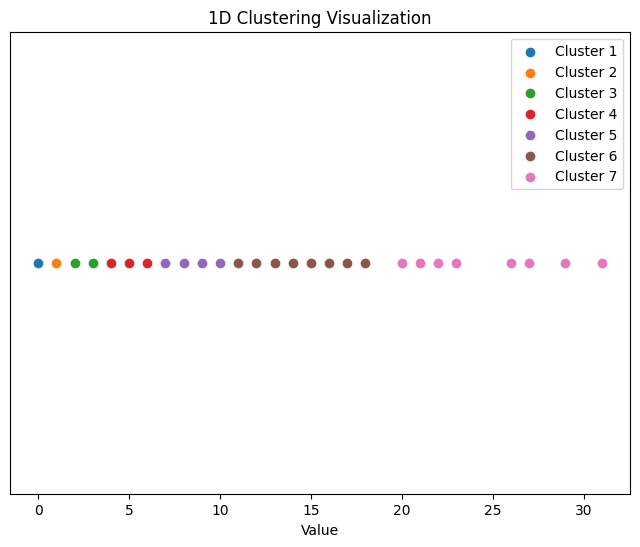

In [8]:
ordered_clustering.plot_clusters(cluster_results[n_classes - 1])

In [9]:
data[target_col_name + ' Relabeled'] = ordered_clustering.relabel(cluster_results[n_classes - 1])
data

,State,County,Year,Month,Flash Flood Occurrence Count,DSCI,None,D0,D1,D2,...,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90,Flash Flood Occurrence Count Relabeled
0,VA,Appomattox County,2010,1,2,0,100.000000,0.000000,0.0,0.0,...,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,7.680000e+13,-332194912.0,3.746295e+09,3
1,VA,Augusta County,2010,1,4,0,100.000000,0.000000,0.0,0.0,...,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,4.880000e+14,15378728.0,3.376817e+09,4
2,VA,Bath County,2010,1,1,0,100.000000,0.000000,0.0,0.0,...,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,3.800000e+14,0.0,5.823914e+09,2
3,VA,Botetourt County,2010,1,5,0,100.000000,0.000000,0.0,0.0,...,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,4.410000e+14,79725392.0,5.026470e+09,4
4,VA,Buckingham County,2010,1,2,0,100.000000,0.000000,0.0,0.0,...,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,1.100000e+14,-330291104.0,3.485563e+09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,VA,Mathews County,2022,11,0,0,100.000000,0.000000,0.0,0.0,...,5.352301e+07,-9.530029e+09,1.122834e+10,2.075837e+10,3.185267e+06,3.199294e+08,2.740000e+12,0.0,6.085405e+07,1
3105,VA,Charlotte County,2022,12,0,81,19.037419,80.962581,0.0,0.0,...,2.013440e+09,-2.479000e+10,2.098264e+10,4.577264e+10,6.810913e+07,1.908681e+09,1.100000e+14,-65774708.0,2.249278e+09,1
3106,VA,Emporia City,2022,12,0,16,83.870968,16.129032,0.0,0.0,...,8.932176e+08,-1.247816e+10,1.222974e+10,2.470791e+10,5.104680e+07,1.353999e+09,1.160000e+12,0.0,1.192570e+09,1
3107,VA,Manassas City,2022,12,0,23,77.419355,22.580645,0.0,0.0,...,1.217640e+09,-2.033943e+10,1.604419e+10,3.638362e+10,4.476273e+07,1.676904e+09,1.550000e+12,0.0,1.466368e+09,1


In [10]:
for label, cluster in cluster_results[n_classes - 1]:
    print(f"Cluster {label}: {list(cluster)}")

Cluster 1: [0]
Cluster 2: [1]
Cluster 3: [2, 3]
Cluster 4: [4, 5, 6]
Cluster 5: [7, 8, 9, 10]
Cluster 6: [11, 12, 13, 14, 15, 16, 17, 18]
Cluster 7: [20, 21, 22, 23, 26, 27, 29, 31]


In [11]:
data_preprocessor = DataPreprocessor(cluster_results[n_classes - 1], data, target_col_name)

In [12]:
X, y = data_preprocessor.X_and_y()

In [13]:
X

,DSCI,None,D0,D1,PCP Value,PCP Rank,PCP Anomaly (1901-2000 base period),1901-2000 PCP Mean,TMAX Value,TMAX Rank,...,Planar Curvature Std,Planar Curvature Sum,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Pct90
0,0,100.000000,0.000000,0.0,4.38,106,1.0114,3.37,43.2,47,...,3.209239e+09,7.850000e+13,3.146490e+09,-4.776859e+10,5.705438e+10,1.050000e+11,6.701598e+07,3.519920e+09,7.680000e+13,3.746295e+09
1,0,100.000000,0.000000,0.0,4.29,112,1.2949,3.00,37.1,27,...,3.558302e+09,4.850000e+14,3.465791e+09,-3.956919e+10,4.348402e+10,8.305321e+10,1.455832e+08,3.540391e+09,4.880000e+14,3.376817e+09
2,0,100.000000,0.000000,0.0,4.29,106,1.0579,3.23,35.4,17,...,5.413818e+09,3.840000e+14,5.948474e+09,-4.836821e+10,6.745287e+10,1.160000e+11,2.062278e+08,5.431594e+09,3.800000e+14,5.823914e+09
3,0,100.000000,0.000000,0.0,4.69,114,1.4789,3.21,38.9,18,...,4.876742e+09,4.380000e+14,5.407946e+09,-5.651770e+10,6.560464e+10,1.220000e+11,2.361656e+08,4.642131e+09,4.410000e+14,5.026470e+09
4,0,100.000000,0.000000,0.0,3.93,96,0.5552,3.37,44.0,47,...,3.090377e+09,1.100000e+14,2.952804e+09,-5.696386e+10,5.237183e+10,1.090000e+11,5.508241e+07,3.432519e+09,1.100000e+14,3.485563e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,0,100.000000,0.000000,0.0,3.58,89,0.8747,2.71,62.7,107,...,2.250778e+08,2.650000e+12,5.352301e+07,-9.530029e+09,1.122834e+10,2.075837e+10,3.185267e+06,3.199294e+08,2.740000e+12,6.085405e+07
3105,81,19.037419,80.962581,0.0,3.98,95,0.7345,3.25,48.1,58,...,1.798514e+09,1.100000e+14,2.013440e+09,-2.479000e+10,2.098264e+10,4.577264e+10,6.810913e+07,1.908681e+09,1.100000e+14,2.249278e+09
3106,16,83.870968,16.129032,0.0,3.47,71,0.1963,3.27,51.1,57,...,9.009857e+08,1.160000e+12,8.932176e+08,-1.247816e+10,1.222974e+10,2.470791e+10,5.104680e+07,1.353999e+09,1.160000e+12,1.192570e+09
3107,23,77.419355,22.580645,0.0,4.57,106,1.6129,2.96,47.2,84,...,1.377612e+09,1.850000e+12,1.217640e+09,-2.033943e+10,1.604419e+10,3.638362e+10,4.476273e+07,1.676904e+09,1.550000e+12,1.466368e+09


In [14]:
y

0       3
1       4
2       2
3       4
4       3
       ..
3104    1
3105    1
3106    1
3107    1
3108    1
Name: Flash Flood Occurrence Count Relabeled, Length: 3109, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = data_preprocessor.pipeline(X, y)

In [16]:
folder = 'ann_tuning_flash_flood_oc'

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor (e.g., validation loss)
    patience=100,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best-performing model
    )

In [17]:
ann_model = ANNModel(n_classes, X_train, X_test, y_train, y_test, folder, early_stopping)

INFO:tensorflow:Reloading Tuner from .\ann_tuning_flash_flood_oc\tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\ann_tuning_flash_flood_oc
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
num_layers: 5
units_0: 288
activation: relu
learning_rate: 0.001
units_1: 32
units_2: 512
units_3: 416
units_4: 128
Score: 0.527974259853363

Trial 04 summary
Hyperparameters:
num_layers: 5
units_0: 288
activation: relu
learning_rate: 0.0001
units_1: 384
units_2: 128
units_3: 352
units_4: 128
Score: 0.5271168112754822

Trial 06 summary
Hyperparameters:
num_layers: 4
units_0: 288
activation: relu
learning_rate: 0.01
units_1: 96
units_2: 224
units_3: 352
units_4: 32
Score: 0.5262593626976013

Trial 02 summary
Hyperparameters:
num_layers: 2
units_0: 448
activation: relu
learning_rate: 0.01
units_1: 512
units_2: 416
units_3: 288
units_4: 64
Score: 0.5241157412528992

Trial 01 summary
Hyperparameters:
num_layers: 5
unit

In [18]:
ann_model.train_and_predict()

Epoch 1/200
6/6 [==============================] - 1s 65ms/step - loss: 1.8498 - accuracy: 0.1976 - val_loss: 1.5493 - val_accuracy: 0.3612
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 1.5665 - accuracy: 0.4521 - val_loss: 1.2974 - val_accuracy: 0.4384
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 1.2636 - accuracy: 0.5223 - val_loss: 1.3067 - val_accuracy: 0.4491
Epoch 4/200
6/6 [==============================] - 0s 17ms/step - loss: 1.0509 - accuracy: 0.5788 - val_loss: 1.3648 - val_accuracy: 0.4352
Epoch 5/200
6/6 [==============================] - 0s 19ms/step - loss: 0.9109 - accuracy: 0.6458 - val_loss: 1.3000 - val_accuracy: 0.4802
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.7933 - accuracy: 0.6911 - val_loss: 1.2829 - val_accuracy: 0.4620
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 0.7058 - accuracy: 0.7325 - val_loss: 1.3244 - val_accuracy: 0.4202
Epoch 8/200
6/6 [===

In [19]:
ann_model.evaluate()

30/30 [==============================] - 0s 2ms/step - loss: 5.1132 - accuracy: 0.5016
Test Loss: 5.1132402420043945
Test Accuracy: 0.5016077160835266


In [20]:
ann_model.scores()

Accuracy: 0.5016077170418006
Precision: 0.31456895540476204
Recall: 0.2794784075136159
F1-Score: 0.28688917192911195


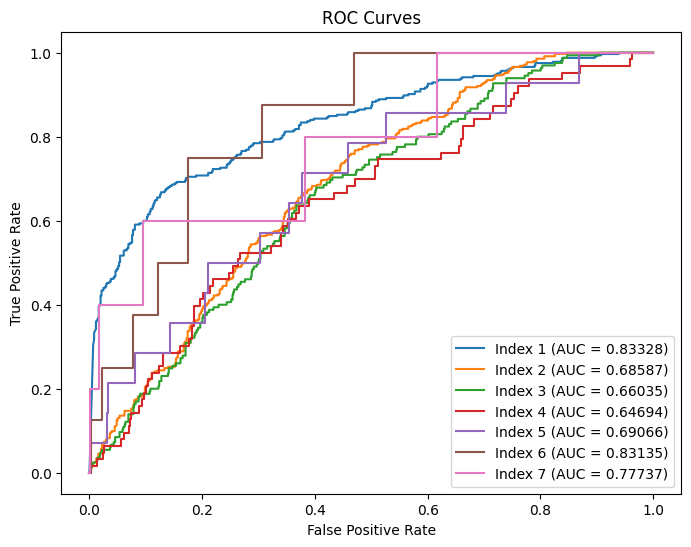

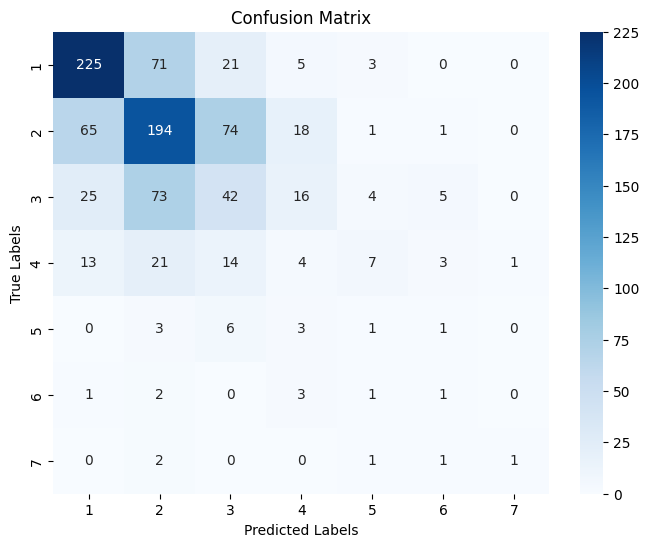

In [21]:
ann_model.figures()